In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [3]:
# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [4]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [6]:
# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [7]:
# Construct a linear model
activation = tf.add(tf.mul(X, W), b)

In [8]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [9]:
# Initializing the variables
init = tf.initialize_all_variables()

In [22]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print "Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    print "cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b)

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

Epoch: 0001 cost= 3.389688730 W= 0.0198441 b= -0.273522
Epoch: 0051 cost= 0.134034902 W= 0.383208 b= -0.159746
Epoch: 0101 cost= 0.127440125 W= 0.375261 b= -0.102578
Epoch: 0151 cost= 0.121607177 W= 0.367787 b= -0.0488099
Epoch: 0201 cost= 0.116448022 W= 0.360758 b= 0.00175997
Epoch: 0251 cost= 0.111884907 W= 0.354146 b= 0.0493223
Epoch: 0301 cost= 0.107848980 W= 0.347928 b= 0.0940558
Epoch: 0351 cost= 0.104279339 W= 0.34208 b= 0.136129
Epoch: 0401 cost= 0.101122171 W= 0.336579 b= 0.1757
Epoch: 0451 cost= 0.098329842 W= 0.331405 b= 0.212917
Epoch: 0501 cost= 0.095860250 W= 0.32654 b= 0.247921
Epoch: 0551 cost= 0.093676031 W= 0.321963 b= 0.280843
Epoch: 0601 cost= 0.091744311 W= 0.317659 b= 0.311807
Epoch: 0651 cost= 0.090035893 W= 0.313611 b= 0.340929
Epoch: 0701 cost= 0.088524953 W= 0.309804 b= 0.36832
Epoch: 0751 cost= 0.087188691 W= 0.306222 b= 0.394082
Epoch: 0801 cost= 0.086007021 W= 0.302854 b= 0.418311
Epoch: 0851 cost= 0.084961981 W= 0.299687 b= 0.441099
Epoch: 0901 cost= 0.084

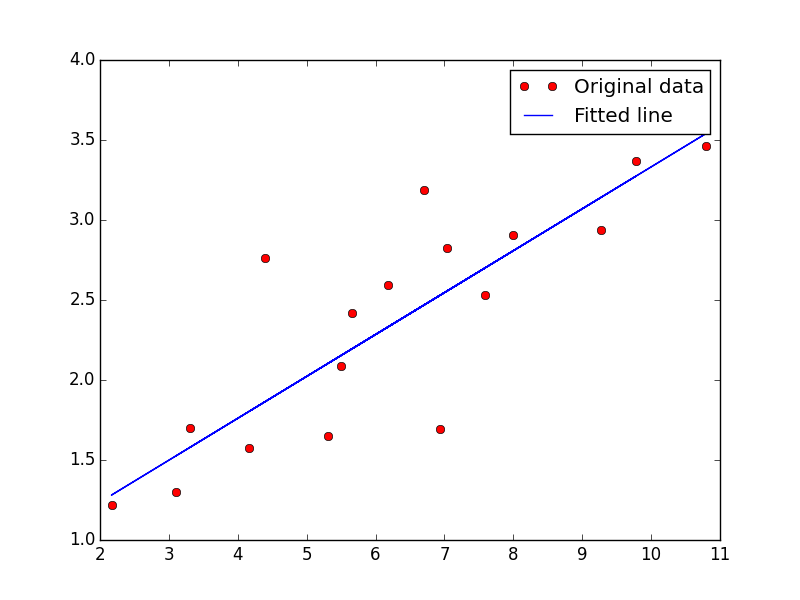

In [23]:
from IPython.display import Image
Image(filename='linearreg.png')